In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def load_local_dataset(file_path):
    """
    Loads a dataset from a local file and returns a pandas DataFrame.

    Parameters:
        file_path (str): Path to the local dataset file.

    Returns:
        pd.DataFrame: Loaded dataset.
    """
    try:
        print(f"Loading dataset from {file_path}...")
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None


In [3]:
# Configuration: Set the relative path to the dataset
LOCAL_FILE_PATH = os.path.join("..", "data", "raw", "Telco-Customer-Churn-Dataset.csv")

# Load the dataset
dataset = load_local_dataset(LOCAL_FILE_PATH)


Loading dataset from ../data/raw/Telco-Customer-Churn-Dataset.csv...
Dataset loaded successfully!


In [4]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dataset_info = dataset.info()
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
if dataset is not None:
    dataset_summary = dataset.describe()
    print(dataset_summary)

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [7]:
if dataset is not None:
    dataset_head = dataset.head()
    print(dataset_head)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [8]:
# Check for missing values
missing_values = dataset.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")


Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# Drop rows with missing values (if any)
dataset_cleaned = dataset.dropna(axis=0, how='any')  # Drop rows with missing values
# Or fill missing values with a specific value, e.g., the mean of the column
# dataset_cleaned = dataset.fillna(dataset.mean())

# Display the cleaned dataset
print(dataset_cleaned.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [10]:
# Example: One-hot encode categorical columns
dataset_encoded = pd.get_dummies(dataset_cleaned, drop_first=True)

# Display the encoded dataset
print(dataset_encoded.head())


   SeniorCitizen  tenure  MonthlyCharges  customerID_0003-MKNFE  \
0              0       1           29.85                  False   
1              0      34           56.95                  False   
2              0       2           53.85                  False   
3              0      45           42.30                  False   
4              0       2           70.70                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  ...  \
0                  False                  False                  False  .

In [11]:
from sklearn.preprocessing import StandardScaler

# Example: Standard scaling of numerical columns
scaler = StandardScaler()
dataset_scaled = dataset_encoded.copy()  # Make a copy of the dataset to avoid altering the original
numerical_columns = dataset_scaled.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling
dataset_scaled[numerical_columns] = scaler.fit_transform(dataset_scaled[numerical_columns])

# Display the scaled dataset
print(dataset_scaled.head())


   SeniorCitizen    tenure  MonthlyCharges  customerID_0003-MKNFE  \
0      -0.439916 -1.277445       -1.160323                  False   
1      -0.439916  0.066327       -0.259629                  False   
2      -0.439916 -1.236724       -0.362660                  False   
3      -0.439916  0.514251       -0.746535                  False   
4      -0.439916 -1.236724        0.197365                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  ...  \
0                  False                  False              

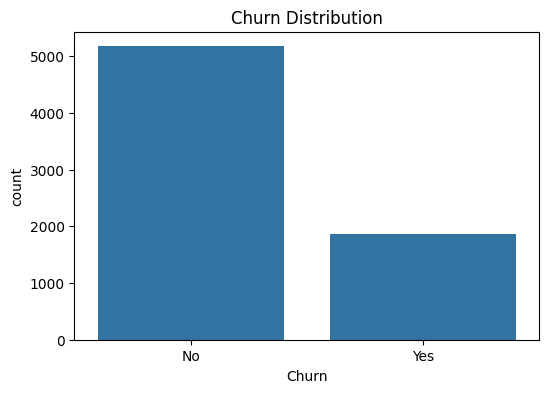

In [12]:
# Example: Plotting the distribution of the 'Churn' column
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Churn')
plt.title('Churn Distribution')
plt.show()


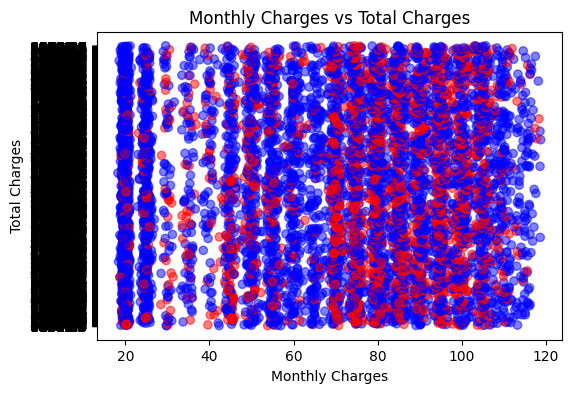

In [13]:
# Example: Scatter plot using matplotlib for faster rendering
plt.figure(figsize=(6, 4))
plt.scatter(dataset['MonthlyCharges'], dataset['TotalCharges'], c=dataset['Churn'].map({'Yes': 'red', 'No': 'blue'}), alpha=0.5)
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

# EDA

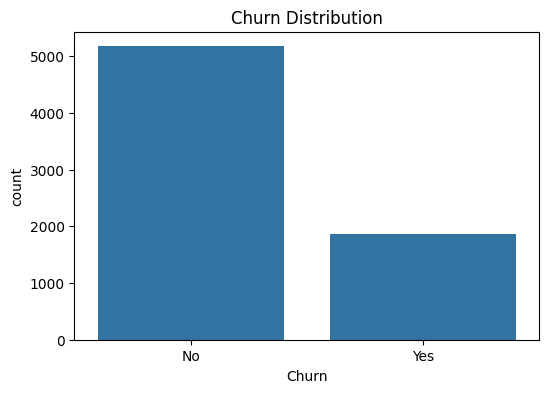

In [14]:
# Plotting the distribution of the 'Churn' column
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Churn')
plt.title('Churn Distribution')
plt.show()


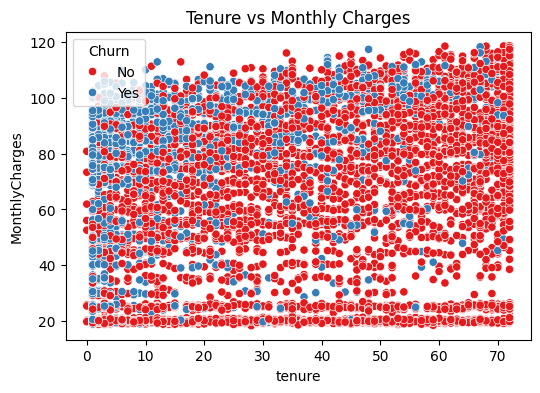

In [15]:
# Scatter plot between 'tenure' and 'MonthlyCharges', colored by 'Churn'
plt.figure(figsize=(6, 4))
sns.scatterplot(data=dataset, x='tenure', y='MonthlyCharges', hue='Churn', palette='Set1')
plt.title('Tenure vs Monthly Charges')
plt.show()


# Feature Engineering

In [16]:
# Check for categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")

Categorical columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [17]:
# Create tenure groups
def tenure_grouping(tenure):
    if tenure <= 12:
        return "0-12"
    elif tenure <= 24:
        return "13-24"
    elif tenure <= 36:
        return "25-36"
    elif tenure <= 48:
        return "37-48"
    elif tenure <= 60:
        return "49-60"
    else:
        return "61+"

# Apply tenure grouping
dataset['TenureGroup'] = dataset['tenure'].apply(tenure_grouping)
print(dataset[['tenure', 'TenureGroup']].head())


   tenure TenureGroup
0       1        0-12
1      34       25-36
2       2        0-12
3      45       37-48
4       2        0-12


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale MonthlyCharges and create a new column
dataset['MonthlyCharges_Scaled'] = scaler.fit_transform(dataset[['MonthlyCharges']])
print(dataset[['MonthlyCharges', 'MonthlyCharges_Scaled']].head())


   MonthlyCharges  MonthlyCharges_Scaled
0           29.85               0.115423
1           56.95               0.385075
2           53.85               0.354229
3           42.30               0.239303
4           70.70               0.521891


In [19]:
# Replace non-numeric TotalCharges values with NaN and impute
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

# Impute missing values without inplace=True
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(dataset['TotalCharges'].median())

# Check for negative or zero values before log transformation
if (dataset['TotalCharges'] <= 0).any():
    print("Warning: There are negative or zero values in 'TotalCharges'")

# Create a new column for log-transformed TotalCharges
dataset['Log_TotalCharges'] = np.log1p(dataset['TotalCharges'])
print(dataset[['TotalCharges', 'Log_TotalCharges']].head())



   TotalCharges  Log_TotalCharges
0         29.85          3.429137
1       1889.50          7.544597
2        108.15          4.692723
3       1840.75          7.518471
4        151.65          5.028148


In [20]:
print(dataset.isnull().sum())


customerID               0
gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges             0
Churn                    0
TenureGroup              0
MonthlyCharges_Scaled    0
Log_TotalCharges         0
dtype: int64


In [21]:
print(dataset.select_dtypes(include=['object']).head())


   customerID  gender Partner Dependents PhoneService     MultipleLines  \
0  7590-VHVEG  Female     Yes         No           No  No phone service   
1  5575-GNVDE    Male      No         No          Yes                No   
2  3668-QPYBK    Male      No         No          Yes                No   
3  7795-CFOCW    Male      No         No           No  No phone service   
4  9237-HQITU  Female      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No 

In [22]:
Q1 = dataset['MonthlyCharges'].quantile(0.25)
Q3 = dataset['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset['MonthlyCharges'] = dataset['MonthlyCharges'].clip(lower_bound, upper_bound)


In [23]:
print(dataset.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingMovies  \
0  No phone service             DSL             No  ...              No   
1                No             DSL            Yes  ...              No   
2                No             DSL            Yes  ...              No   
3  No phone service             DSL            Yes  ...              No   
4                No     Fiber optic             No  ...              No   

         Contract PaperlessBilling              PaymentMethod Monthl

No more processing required as we have handeled the missing values

In [24]:
# Save the processed dataset to a CSV file
dataset.to_csv("telco_processed_data.csv", index=False)

print("Dataset successfully saved as 'processed_data.csv'")


Dataset successfully saved as 'processed_data.csv'


# Model Training

In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [26]:
# Load your dataset
df = pd.read_csv('telco_processed_data.csv')  # Replace with the path to your dataset


In [27]:
# Step 1: Define categorical and multicategorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
multi_category_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                          'Contract', 'PaymentMethod']


In [28]:
# Step 2: Separate target variable and features
X = df.drop('Churn', axis=1)  # Assuming 'Churn' is the target variable
y = df['Churn']

In [29]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Step 4: Encode Categorical Columns using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])


In [31]:
# Step 5: Encode Multicategorical Columns using OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# For training data
X_train_encoded = pd.DataFrame(onehot_encoder.fit_transform(X_train[multi_category_columns]))
X_train_encoded.columns = onehot_encoder.get_feature_names_out(multi_category_columns)
X_train = X_train.drop(multi_category_columns, axis=1).reset_index(drop=True)
X_train = pd.concat([X_train, X_train_encoded], axis=1)

# For testing data
X_test_encoded = pd.DataFrame(onehot_encoder.transform(X_test[multi_category_columns]))
X_test_encoded.columns = onehot_encoder.get_feature_names_out(multi_category_columns)
X_test = X_test.drop(multi_category_columns, axis=1).reset_index(drop=True)
X_test = pd.concat([X_test, X_test_encoded], axis=1)


In [32]:
# Step 6: Feature Scaling (Optional but often recommended for logistic regression)

# Exclude non-numeric columns from scaling
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Apply feature scaling only to numeric columns
scaler = StandardScaler()

X_train_scaled = X_train[numeric_columns]
X_test_scaled = X_test[numeric_columns]

X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Replace scaled values back into the original DataFrame
X_train[numeric_columns] = X_train_scaled
X_test[numeric_columns] = X_test_scaled


In [33]:
# Step 7: Initialize and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [34]:
# Step 8: Make Predictions
y_pred = logreg.predict(X_test_scaled)


In [35]:
# Step 9: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.81
Confusion Matrix:
[[936 100]
 [163 210]]
Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1036
         Yes       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



# Improving the model

1. Addressing Class Imbalance
Since the dataset is imbalanced (with more "No" churn than "Yes"), we need to address this imbalance. Below are a few techniques that can help:

A. Oversampling the Minority Class (SMOTE)
We can use SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic data points for the minority class ("Yes" churn). This helps the model better learn the characteristics of the churned customers.

In [36]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Step 1: Identify categorical columns in X_train
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Step 2: Apply LabelEncoder to convert categorical columns to numeric
label_encoder = LabelEncoder()

for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])

# Step 3: Now apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Verify the new distribution of the classes
print("Resampled class distribution:", y_train_resampled.value_counts())


Resampled class distribution: Churn
No     4138
Yes    4138
Name: count, dtype: int64


In [37]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler to undersample the majority class in the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Verify the new distribution of the classes
print("Resampled class distribution:", y_train_resampled.value_counts())


Resampled class distribution: Churn
No     1496
Yes    1496
Name: count, dtype: int64


In [39]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with class_weight='balanced'
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


/Users/sarthakchandajkar/Desktop/Projects/Data Engineering/Telco Customer Churn/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

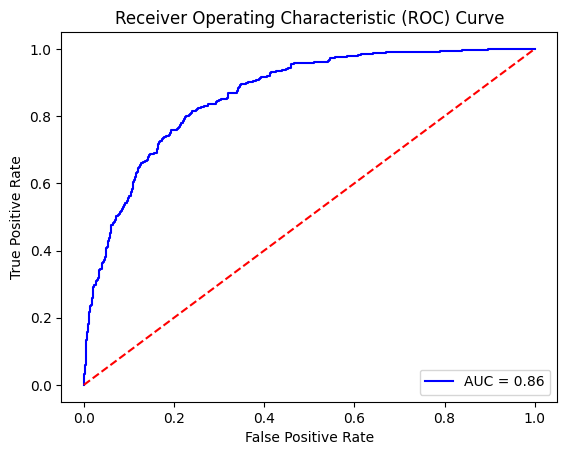

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Encode target labels (y_test) to numeric values
label_encoder_y = LabelEncoder()
y_test_encoded = label_encoder_y.fit_transform(y_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


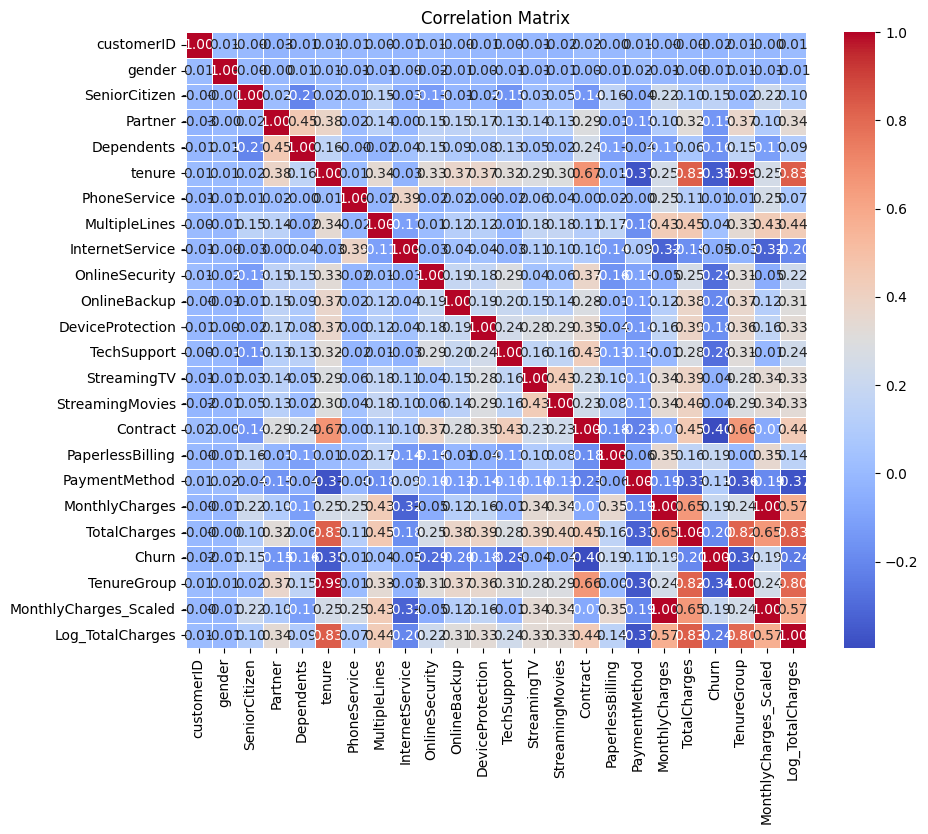

In [47]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()

# Apply it to each categorical column
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Now compute the correlation matrix
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix")
plt.show()


In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


# Log Loss

In [43]:
from sklearn.metrics import log_loss

# Log loss
log_loss_value = log_loss(y_test, model.predict_proba(X_test))
print("Log Loss:", log_loss_value)


Log Loss: 0.5010308457984549


# Cohen's Kappa

In [44]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, model.predict(X_test))
print("Cohen's Kappa Score:", kappa)


Cohen's Kappa Score: 0.45023841291948186


# Learning Curve

/Users/sarthakchandajkar/Desktop/Projects/Data Engineering/Telco Customer Churn/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sarthakchandajkar/Desktop/Projects/Data Engineering/Telco Customer Churn/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to

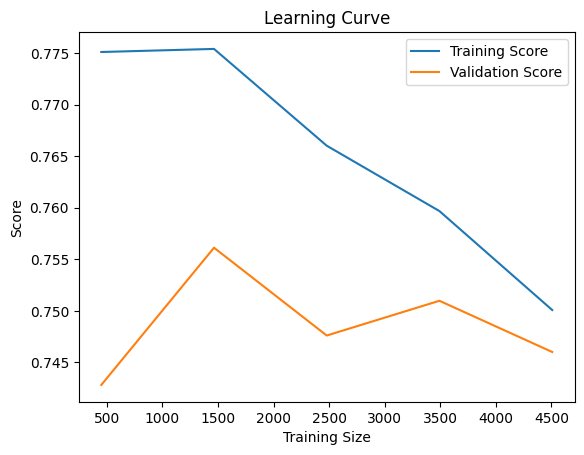

In [45]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation Score")
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.show()


In [46]:
print(type(model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


# XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical features
for col in categorical_columns:
    if df[col].nunique() == 2:
        # Binary encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        # One-hot encoding for multi-category
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Split data into features and target
X = df.drop(columns=['Churn'])  # Replace 'Churn' with the target column
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix format
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.1,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict and evaluate
y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))
print(classification_report(y_test, y_pred))


Accuracy: 0.8041163946061036
AUC: 0.8603064477729356
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



<Axes: xlabel='MonthlyCharges', ylabel='Count'>

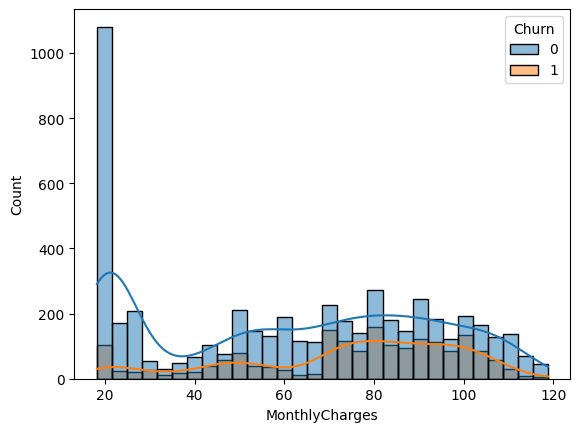

In [126]:
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", kde=True, bins=30)


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

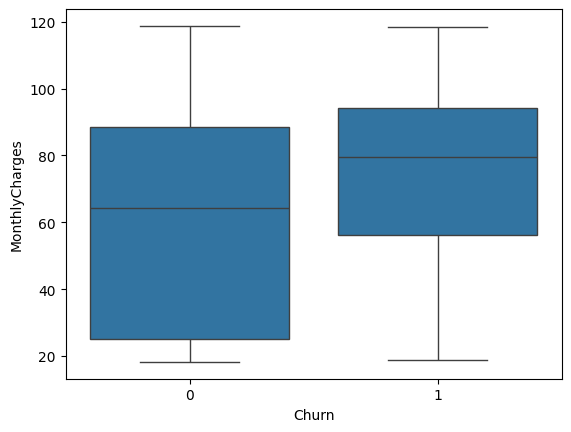

In [127]:
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")


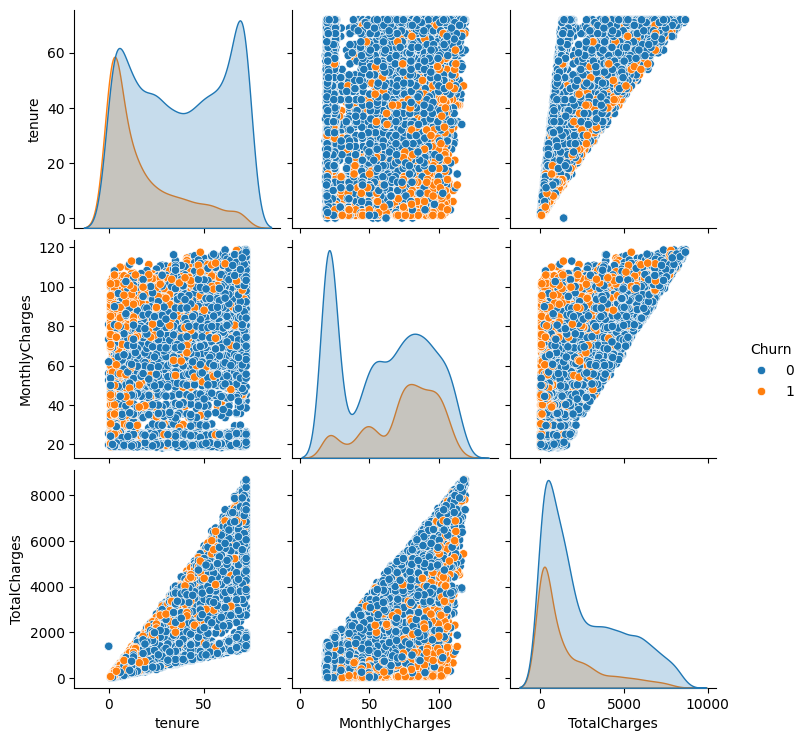

In [128]:
sns.pairplot(df, vars=["tenure", "MonthlyCharges", "TotalCharges"], hue="Churn")


<Axes: >

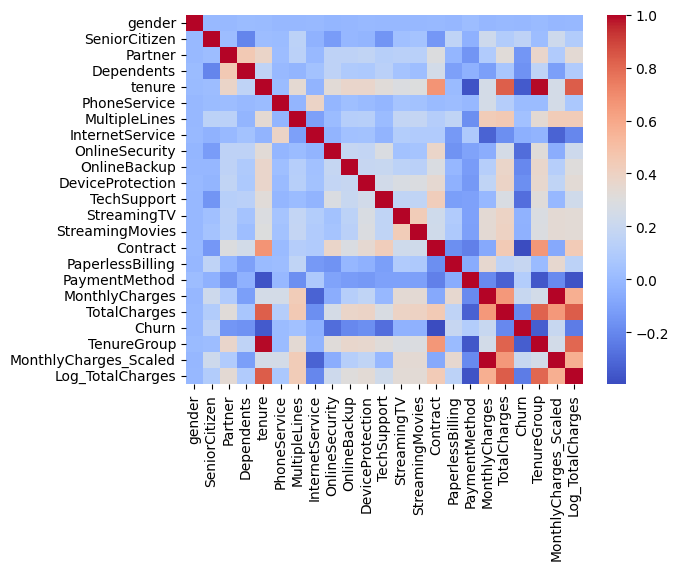

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")


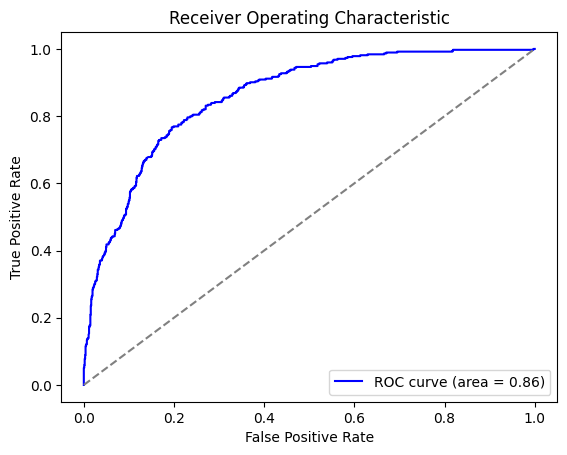

In [131]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# K-Means Clustering


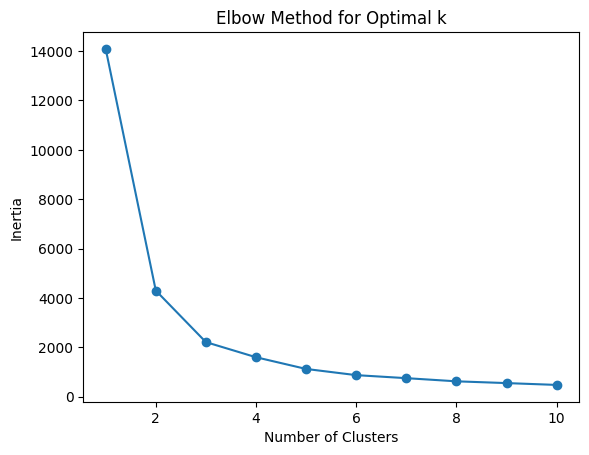

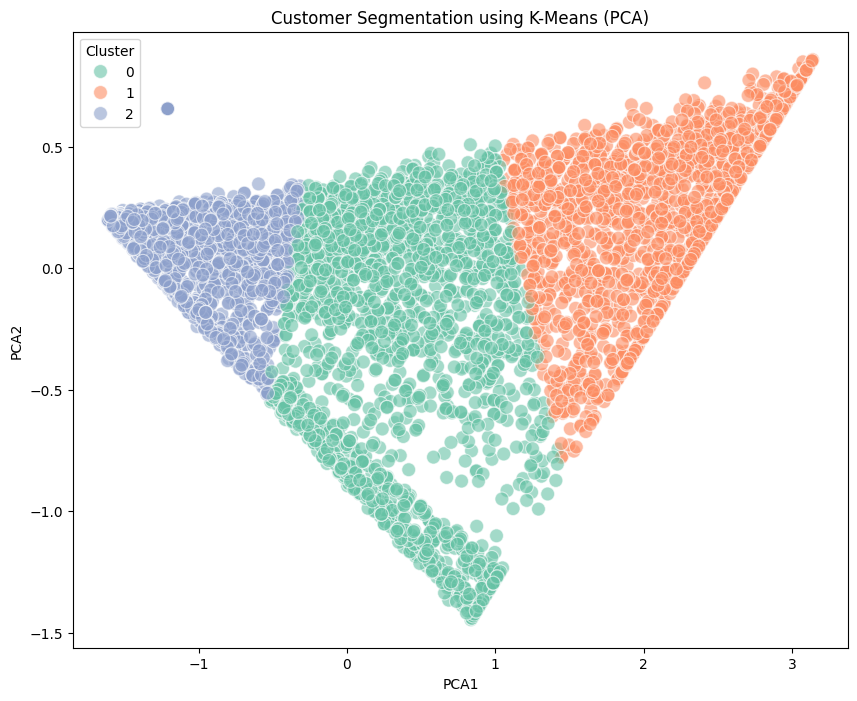

Cluster
0    0.162225
1    0.127226
2    0.396759
Name: Churn, dtype: float64


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load your dataset (assuming 'df' is your dataframe)
# Select relevant features for segmentation (you can adjust these based on your dataset)
features = df[['tenure', 'TotalCharges']]  # Example features
features = pd.get_dummies(features)  # One-hot encode categorical variables if needed

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters (let's assume it's 3 for this example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA components and cluster labels
df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# Visualize the segments
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=df_pca, s=100, alpha=0.6)
plt.title('Customer Segmentation using K-Means (PCA)')
plt.show()

# Now let's check if churn rates vary between the segments
churn_by_cluster = df.groupby('Cluster')['Churn'].mean()  # Assuming 'Churn' is the churn column
print(churn_by_cluster)
